In [2]:
import pandas as ps
import matplotlib.pyplot as pl
import seaborn as sb
import numpy as np

df = ps.read_csv("Mall_Customers.csv")

In [3]:
df.info()
df.columns
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### AGE DISTRIBUTION


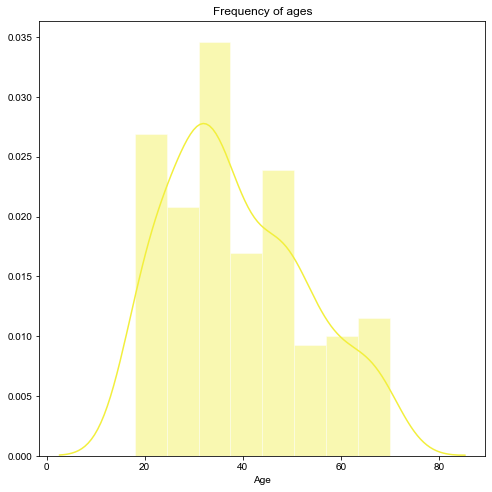

In [4]:
#df.drop(["CustomerID"],axis=1,inplace=True)

pl.figure(figsize=(8,8))
pl.title("Frequency of ages")
sb.set(style='whitegrid')
#sb.axes_style("dark")
sb.distplot(df["Age"],color='#F2EF3D')
pl.show()

### ANNUAL INCOME DISTRIBUTION

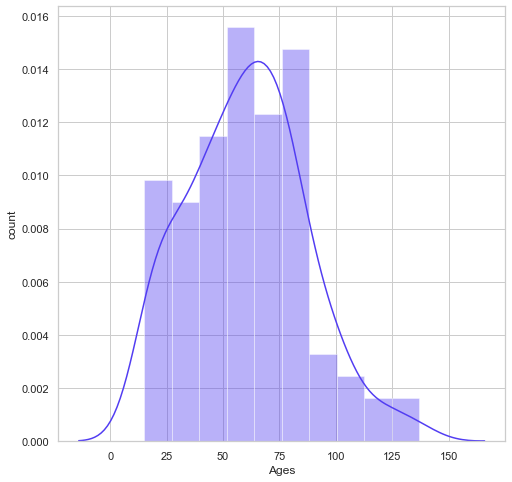

In [5]:

sb.set_style("whitegrid")
pl.figure(figsize=(8,8))
sb.distplot(df['Annual Income (k$)'],color='#523DF2')
pl.xlabel('Ages')
pl.ylabel('count')
pl.show()

### SPENDING SCORE DISTRIBUTION

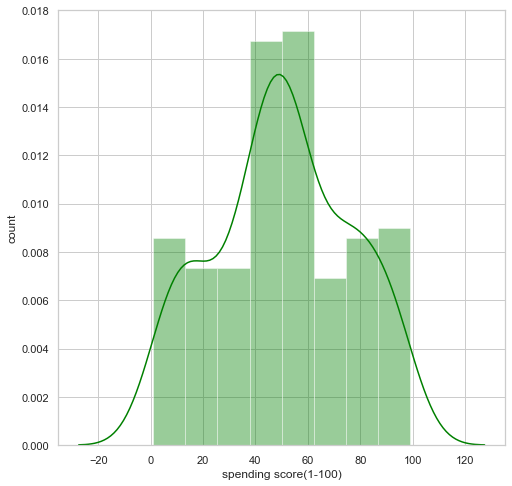

In [6]:
sb.set_style("whitegrid")
pl.figure(figsize=(8,8))
sb.distplot(df['Spending Score (1-100)'],color='#008000')
pl.xlabel('spending score(1-100)')
pl.ylabel('count')
pl.show()

### GENDER ANALYSIS

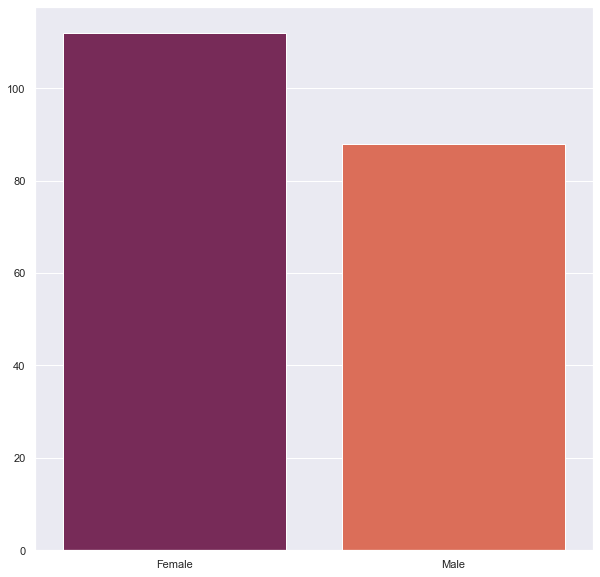

In [7]:
gender = df.Gender.value_counts()
sb.set_style("darkgrid")
pl.figure(figsize=(10,10))
sb.barplot(x=gender.index,y=gender.values, palette='rocket')
pl.show()

### AGE ANALYSIS

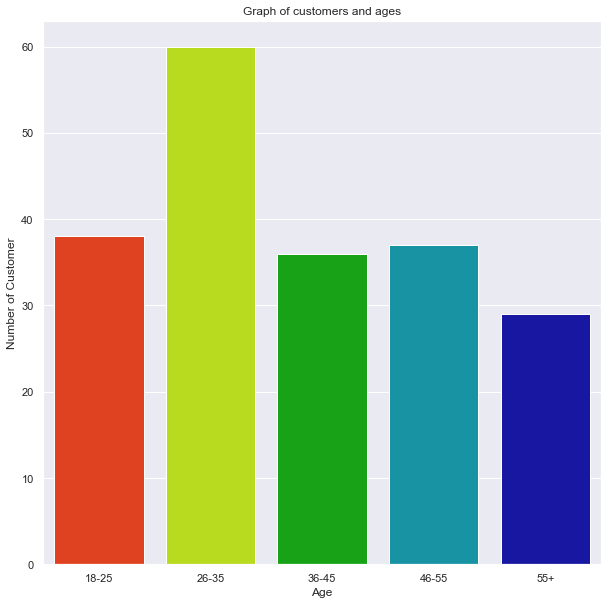

In [8]:
agegroup1 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
agegroup2 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
agegroup3 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
agegroup4 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
agegroup5 = df.Age[df.Age >= 56]

x= ["18-25","26-35","36-45","46-55","55+"]
y= [len(agegroup1.values),len(agegroup2.values),len(agegroup3.values),len(agegroup4.values),len(agegroup5.values)]

pl.figure(figsize=(10,10))
sb.barplot(x=x, y=y,palette="nipy_spectral_r" )
pl.title("Graph of customers and ages")
pl.xlabel("Age")
pl.ylabel("Number of Customer")
pl.show()

### Spending Score Analysis

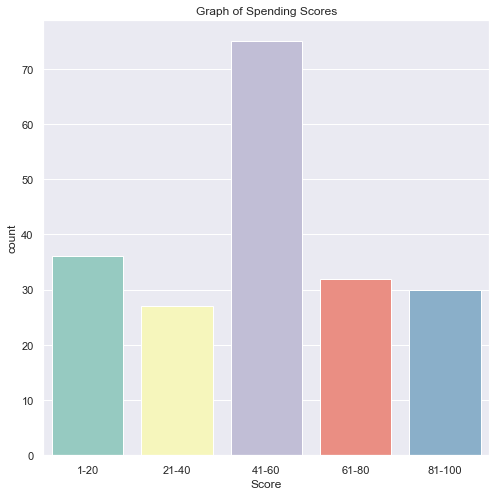

In [9]:
ss1 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss2 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss3 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss4 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss5 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

sx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
sy = [len(ss1.values),len(ss2.values),len(ss3.values),len(ss4.values),len(ss5.values)]

pl.figure(figsize=(8,8))
sb.barplot(x=sx,y=sy,palette="Set3")
pl.title("Graph of Spending Scores")
pl.xlabel("Score")
pl.ylabel("count")
pl.show()

### Annual Income Analysis

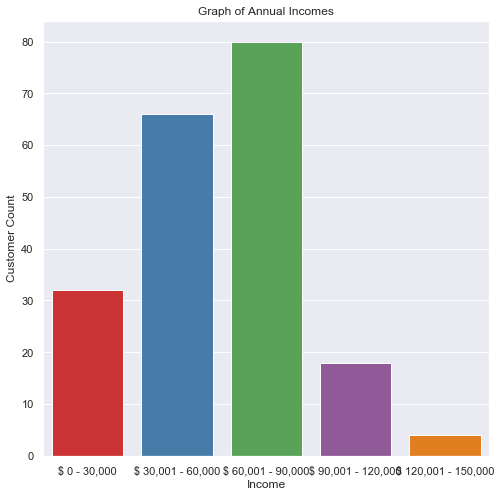

In [10]:
AI1= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
AI2 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
AI3 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
AI4 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
AI5 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

AIx = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
AIy = [len(AI1.values), len(AI2.values), len(AI3.values), len(AI4.values), len(AI5.values)]

pl.figure(figsize=(8,8))
sb.barplot(x=AIx, y=AIy, palette="Set1")
pl.title("Graph of Annual Incomes")
pl.xlabel("Income")
pl.ylabel("Customer Count")
pl.show()

## CLUSTERS IDENTIFICATION

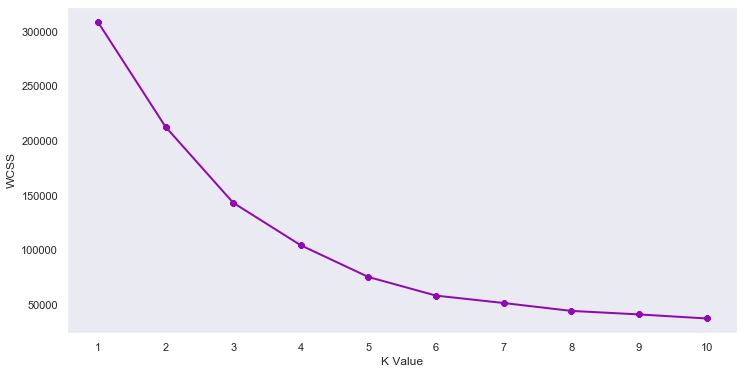

In [11]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(12,6))    
pl.grid()
pl.plot(range(1,11),wcss, linewidth=2, color="#9109B0", marker ="8")
pl.xlabel("K Value")
pl.xticks(np.arange(1,11,1))
pl.ylabel("WCSS")
pl.show()

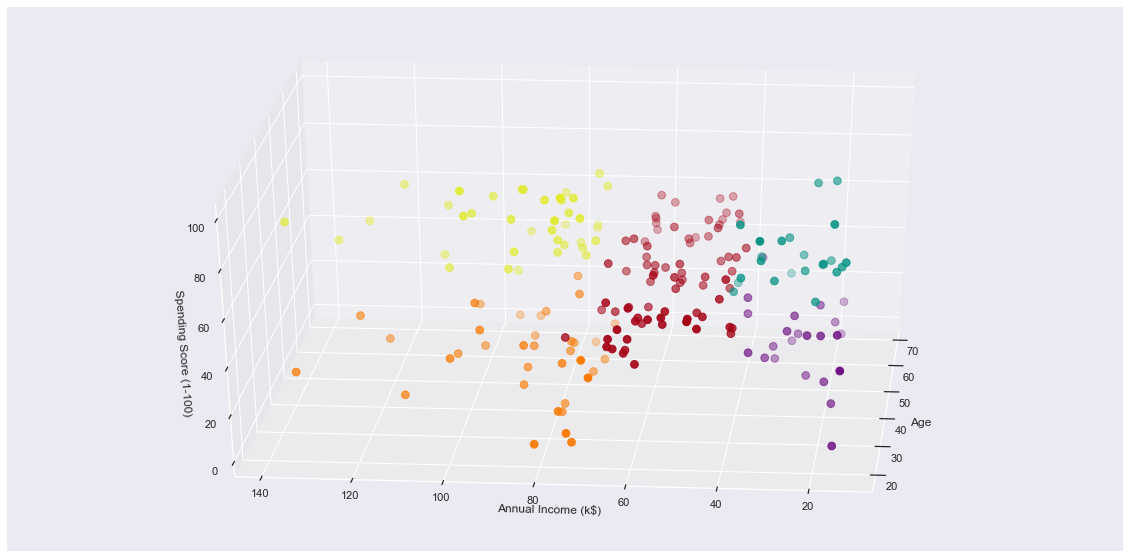

In [12]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

 
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='#701485', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='#A60518', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='#099487', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='#E1EB2A', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='#FA7A03', s=60)
ax.view_init(30, 185)
pl.xlabel("Age")
pl.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
pl.show()